<a href="https://colab.research.google.com/github/riobagas02/Machine-Learning/blob/Week7/Praktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalasi SOM

In [17]:
pip install minisom

In [18]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# Gunakan dataset Iris sebagai contoh

In [19]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

# Normalisasi dataset agar nilainya berada dalam rentang yang seragam.

In [20]:
# Normalisasi data
data = data / data.max(axis=0)

# Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM



In [21]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

# Inisialisasi bobot SOM secara acak.

In [22]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

# Melatih SOM dengan data menggunakan metode train_random.



In [23]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

# Menggunakan peta hasil pelatihan untuk visualisasi. Dalam praktikum ini, akan menampilkan peta dengan warna dan menandai pemenang untuk setiap sampel.

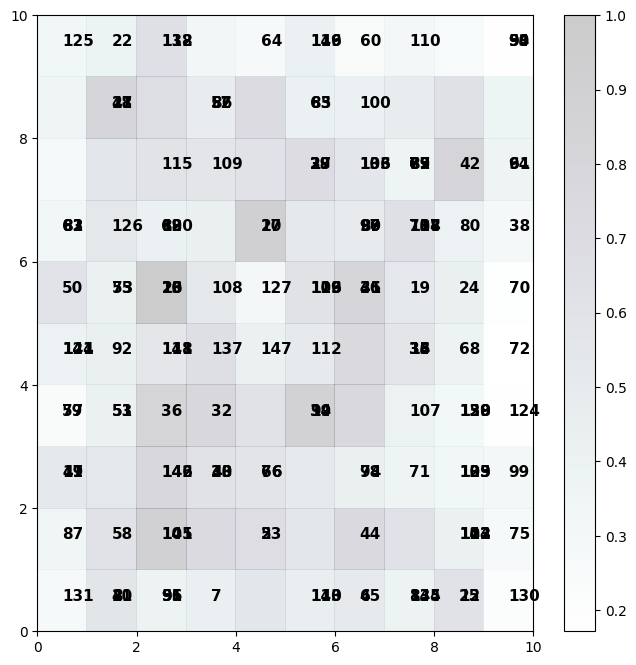

In [24]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()